In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,AutoMinorLocator,ScalarFormatter
from matplotlib.colors import Normalize
from matplotlib import gridspec
import os
import re

In [8]:
cwd = '/Users/dchabeda/Desktop/Rabani/project/rad_lifetime/publication/data/rad_lifetime/CsPbI3/convergence'
print(cwd)

/Users/dchabeda/Desktop/Rabani/project/rad_lifetime/publication/data/rad_lifetime/CsPbI3/convergence


Size = 2.4nm shape = relax



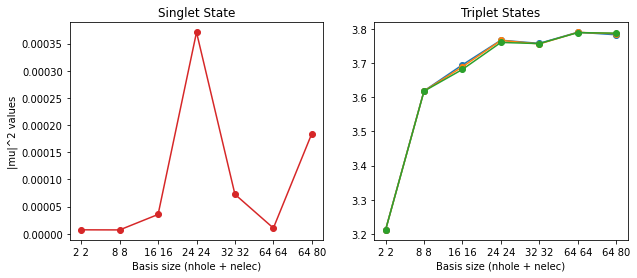

Size = 2.4nm shape = ortho



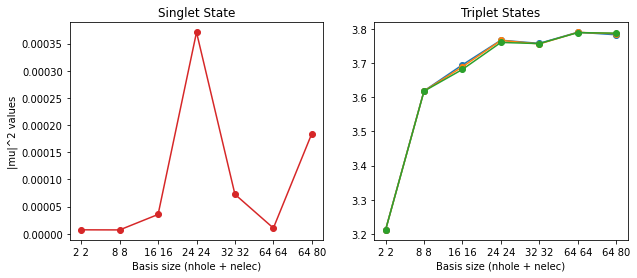

Size = 2.4nm shape = cubic



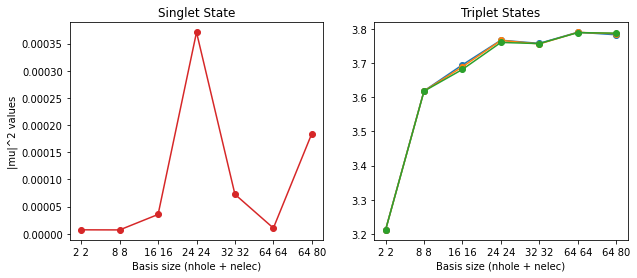

Size = 5.7nm shape = relax



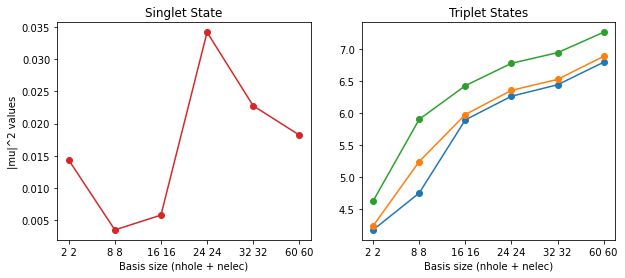

Size = 5.7nm shape = ortho



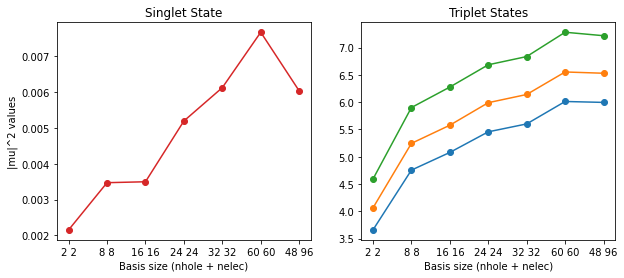

Size = 5.7nm shape = cubic



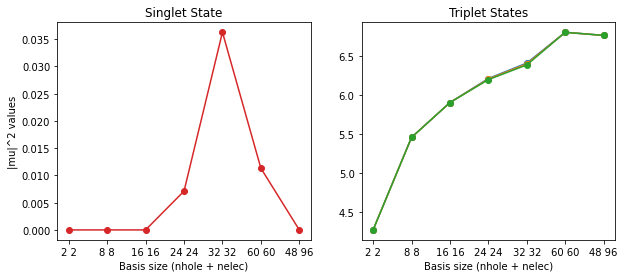

Size = 6.3nm shape = relax



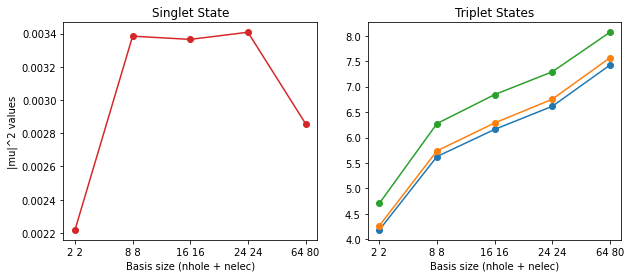

Size = 6.3nm shape = ortho



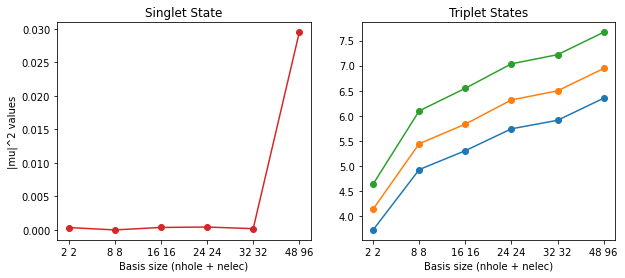

Size = 6.3nm shape = cubic



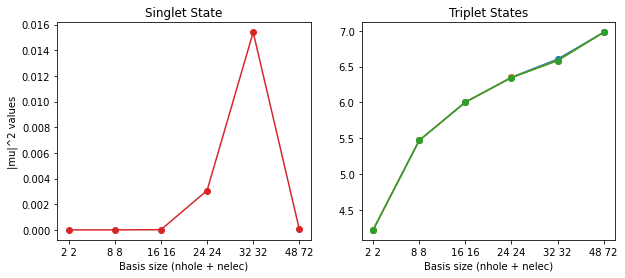

Size = 6.9nm shape = relax



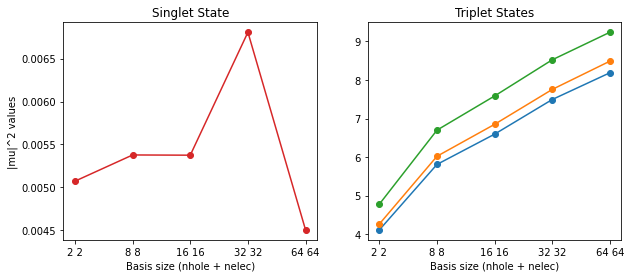

Size = 6.9nm shape = ortho



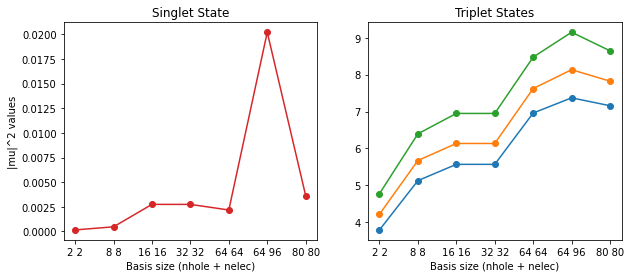

Size = 6.9nm shape = cubic



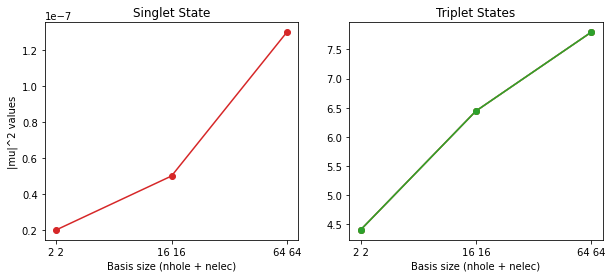

In [13]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

n_st_conv = 4
size_dirs = ['2.4', '5.7', '6.3', '6.9']
shape_dirs = ['relax', 'ortho', 'cubic']

os.chdir(cwd)

for size in size_dirs:
    for shape in shape_dirs:
        
        os.chdir(f"{cwd}/{size}/{shape}")
        print(f"Size = {size}nm shape = {shape}\n")
#         os.chdir(shape)

        basis_sizes = []
        mu_arr = []

        dirs_list = ["2_2", "8_8", "16_16", "24_24", "32_32", "60_60", "64_64", "48_72","48_96" , "64_80","64_96","80_80"]

        for datdir in dirs_list:
            # Get the basis size from the dir name
            match = re.match(r"(\d+)_(\d+)", datdir)
            nelecs, nholes = match.groups()
            

            # Read in the OS.dat file
#             print(f"nelecs = {nelecs} nholes = {nholes}")
            file_path = f"bse_{datdir}"
#             print(file_path)
            try:
                OS = np.loadtxt(f"{file_path}/OS.dat", max_rows=n_st_conv)
            except OSError:
#                 print(f"No file {file_path}/OS.dat\nSkipping!")
                continue
#             print(OS[:4, 1])

            # Extract transition dipoles
            mu_arr.append(OS[:4, 1])
            basis_sizes.append(nelecs + ' ' + nholes)

        basis_sizes = np.array(basis_sizes)
        mu_arr = np.array(mu_arr)

        # Plot the first four mu values
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

        
        # Plot the first value on the secondary axis (ax2)
        ax[0].plot(basis_sizes, mu_arr[:, 0], marker='o', label='mu_1', color='tab:red')

        # Plot the data on the primary axis (ax1)
        for i in range(1, 4):  # Skip the first one for ax1
            ax[1].plot(basis_sizes, mu_arr[:, i], marker='o', label=f'mu_{i+1}')

        # Set labels and title
        ax[0].set_xlabel("Basis size (nhole + nelec)")
        ax[1].set_xlabel("Basis size (nhole + nelec)")
        ax[0].set_ylabel(r"|mu|^2 values")
        #ax2.set_ylabel("Mu value (for mu_1)")

        # Set title
        ax[0].set_title("Singlet State")
        ax[1].set_title("Triplet States")

        # Adding grid and legends
        #ax1.grid(True)
        #ax1.legend(loc='upper left')
        #ax2.legend(loc='upper right')

        # Show the plot
        plt.show()


## Energy convergence

Size = 5.7nm shape = relax



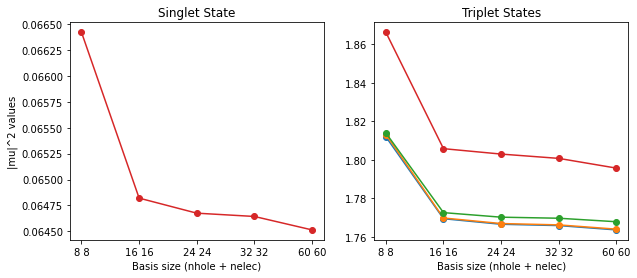

Size = 5.7nm shape = ortho



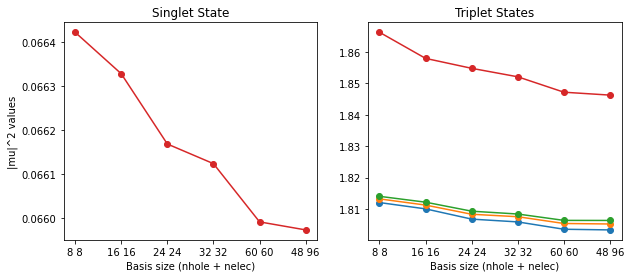

Size = 5.7nm shape = cubic



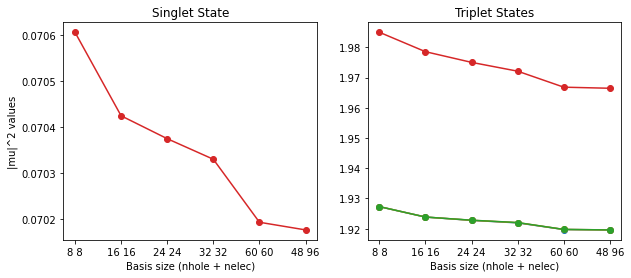

Size = 6.3nm shape = relax



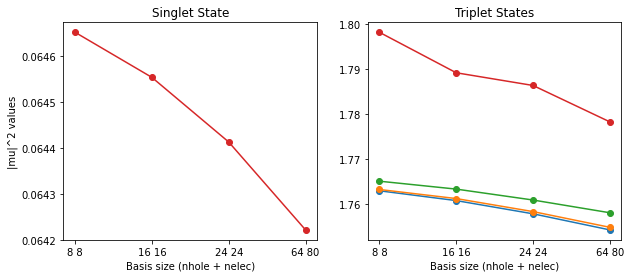

Size = 6.3nm shape = ortho



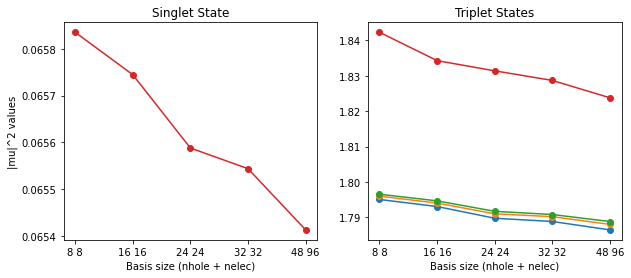

Size = 6.3nm shape = cubic



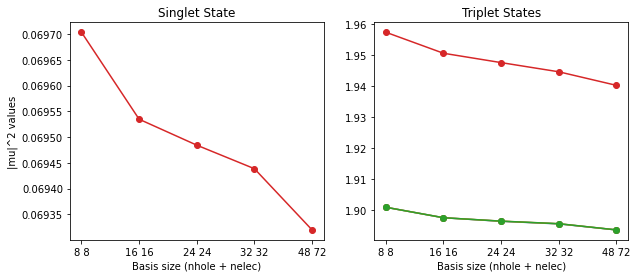

Size = 6.9nm shape = relax



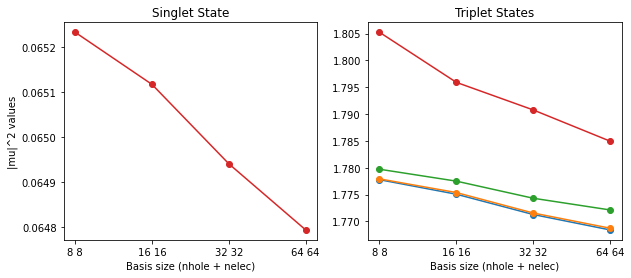

Size = 6.9nm shape = ortho



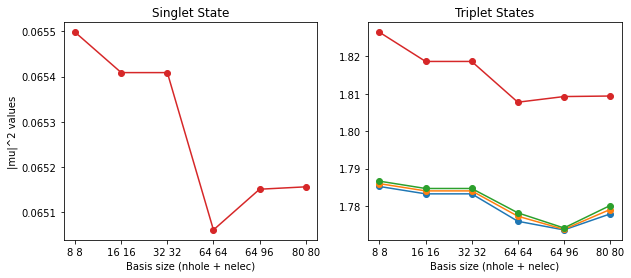

Size = 6.9nm shape = cubic



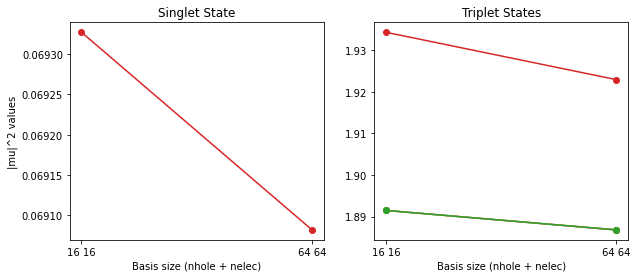

In [14]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

n_st_conv = 5
size_dirs = ['5.7', '6.3', '6.9']
shape_dirs = ['relax', 'ortho', 'cubic']

os.chdir(cwd)

for size in size_dirs:
    for shape in shape_dirs:
        
        os.chdir(f"{cwd}/{size}/{shape}")
        print(f"Size = {size}nm shape = {shape}\n")
#         os.chdir(shape)

        basis_sizes = []
        mu_arr = []

        dirs_list = ["8_8", "16_16", "24_24", "32_32", "60_60", "64_64", "48_72","48_96" , "64_80","64_96","80_80"]

        for datdir in dirs_list:
            # Get the basis size from the dir name
            match = re.match(r"(\d+)_(\d+)", datdir)
            nelecs, nholes = match.groups()
            

            # Read in the OS.dat file
#             print(f"nelecs = {nelecs} nholes = {nholes}")
            file_path = f"bse_{datdir}"
#             print(file_path)
            try:
                OS = np.loadtxt(f"{file_path}/OS.dat", max_rows=n_st_conv)
                #print(OS)
            except OSError:
#                 print(f"No file {file_path}/OS.dat\nSkipping!")
                continue
#             print(OS[:4, 1])

            # Extract transition dipoles
            mu_arr.append(OS[:n_st_conv, 2])
            basis_sizes.append(nelecs + ' ' + nholes)

        basis_sizes = np.array(basis_sizes)
        mu_arr = np.array(mu_arr)
#         print(mu_arr)
        # Plot the first four mu values
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

        
        # Plot the first value on the secondary axis (ax2)
        ax[0].plot(basis_sizes, mu_arr[:, 0], marker='o', label='mu_1', color='tab:red')

        # Plot the data on the primary axis (ax1)
        for i in range(1, n_st_conv):  # Skip the first one for ax1
            ax[1].plot(basis_sizes, mu_arr[:, i]*27.211, marker='o', label=f'mu_{i+1}')

        # Set labels and title
        ax[0].set_xlabel("Basis size (nhole + nelec)")
        ax[1].set_xlabel("Basis size (nhole + nelec)")
        ax[0].set_ylabel(r"|mu|^2 values")
        #ax2.set_ylabel("Mu value (for mu_1)")

        # Set title
        ax[0].set_title("Singlet State")
        ax[1].set_title("Triplet States")

        # Adding grid and legends
        #ax1.grid(True)
        #ax1.legend(loc='upper left')
        #ax2.legend(loc='upper right')

        # Show the plot
        plt.show()


In [5]:
n_el = 2
n_ho = 2
lidx = 2

for a in range(n_el):
    for b in range(n_el):
        for i in range(n_ho):
            for j in range(n_ho):
                ibs = a * n_ho + i
                jbs = b * n_ho + j
                print(f"{ibs}, {jbs}")
                


0, 0
0, 1
1, 0
1, 1
0, 2
0, 3
1, 2
1, 3
2, 0
2, 1
3, 0
3, 1
2, 2
2, 3
3, 2
3, 3


In [6]:
import numpy as np
from tabulate import tabulate

def generate_index_table(n_el, n_ho):
    table = np.empty((n_el * n_ho, n_el * n_ho), dtype=object)
    j_start = 0
    for a in range(0,n_el):
        for b in range(a, n_el):  # Ensure a <= b
            listi = []
            listj = []
            for i in range(n_ho):
                j_start = i if a == b else 0  # Ensure i < j when a == b
                for j in range(j_start, n_ho):
                    listi.append(i)
                    listj.append(j)
                    #print(f"{a}, {b}, {i}, {j}")
                    ibs = a * n_ho + i
                    jbs = b * n_ho + j
                    table[ibs, jbs] = f'({a},{b},{i},{j})'
                    table_str = [[str(x) if x is not None else "-" for x in row] for row in table]
                    #print(tabulate(table_str, tablefmt="grid"))
            print(f"a {a} b {b} listi: {listi}")
            print(f"a {a} b {b} listi: {listj}")

    
    return table

# Example usage
n_el = 3  # Number of excited states
n_ho = 4    # Number of hole states
table = generate_index_table(n_el, n_ho)

# Convert table to a printable format
table_str = [[str(x) if x is not None else "-" for x in row] for row in table]
table_str = [["o" if x is not None else " " for x in row] for row in table]
print(tabulate(table_str, tablefmt="grid"))


a 0 b 0 listi: [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]
a 0 b 0 listi: [0, 1, 2, 3, 1, 2, 3, 2, 3, 3]
a 0 b 1 listi: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
a 0 b 1 listi: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
a 0 b 2 listi: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
a 0 b 2 listi: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
a 1 b 1 listi: [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]
a 1 b 1 listi: [0, 1, 2, 3, 1, 2, 3, 2, 3, 3]
a 1 b 2 listi: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
a 1 b 2 listi: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
a 2 b 2 listi: [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]
a 2 b 2 listi: [0, 1, 2, 3, 1, 2, 3, 2, 3, 3]
+---+---+---+---+---+---+---+---+---+---+---+---+
| o | o | o | o | o | o | o | o | o | o | o | o |
+---+---+---+---+---+---+---+---+---+---+---+---+
|   | o | o | o | o | o | o | o | o | o | o | o |
+---+---+---+---+---+---+---+---+---+---+---+---+
|   |   | o | o | o | o | o | o | o | o | o | o |
+---+---+---+---+---+---+---+---+---+---